In [154]:
import pandas as pd
import numpy as np

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

In [164]:
#charges means, medial charges, the target variable for the regression model
df = pd.read_csv('./data/insurance.csv')
df_2 = pd.read_csv('./data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [165]:
print(len(df['sex'].unique()))
print(len(df['smoker'].unique()))
print(len(df['region'].unique()))

2
2
4


In [166]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<h3>EDA<h3>

<h4>Variables Numericas<h4>

df.shape

In [167]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

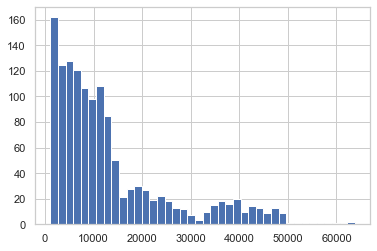

In [168]:
df.charges.hist(bins=40)

In [169]:
def truncate_variable(df, column_name, lower_percentile=0.01, upper_percentile=0.99):
    """
    Trunca los valores de una columna en un dataframe según los percentiles especificados.

    Parámetros:
    - df (pd.DataFrame): el dataframe original.
    - column_name (str): el nombre de la columna a truncar.
    - lower_percentile (float, opcional): el percentil inferior para truncar. Por defecto es 0.01 (1%).
    - upper_percentile (float, opcional): el percentil superior para truncar. Por defecto es 0.99 (99%).

    Retorna:
    - pd.DataFrame: un dataframe con la columna especificada truncada.
    """
    
    lower_value = df[column_name].quantile(lower_percentile)
    upper_value = df[column_name].quantile(upper_percentile)

    df[column_name + '_truncated'] = df[column_name].clip(lower=lower_value, upper=upper_value)
    
    return df

In [170]:
df = truncate_variable(df=df, column_name='charges', lower_percentile=0.01, upper_percentile=0.99)
df

,age,sex,bmi,children,smoker,region,charges,charges_truncated
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500,2007.94500


array([[<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'charges_truncated'}>]], dtype=object)

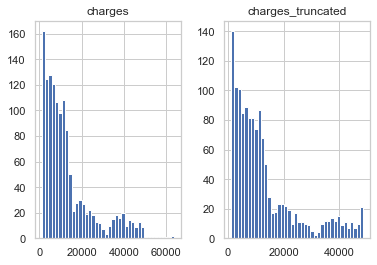

In [172]:
df[['charges','charges_truncated']].hist(bins=40)

In [173]:
df.describe()

,age,bmi,children,charges,charges_truncated,age2,sobre_peso
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,13221.583463,1734.444694,0.528401
std,14.049960,6.098187,1.205493,12110.011237,11940.429739,1125.768602,0.499379
min,18.000000,15.960000,0.000000,1121.873900,1252.972730,324.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,4740.287150,729.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,9382.033000,1521.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,16639.912515,2601.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,48537.480726,4096.000000,1.000000


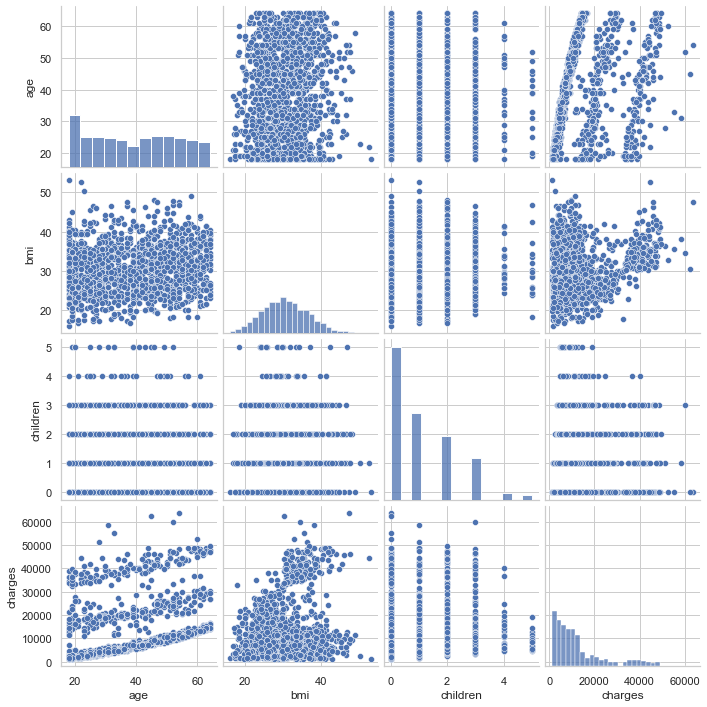

In [123]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])

In [124]:
df[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


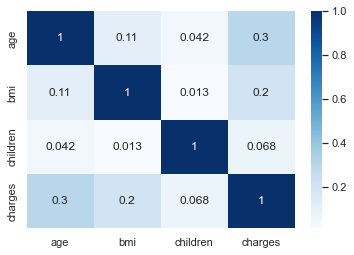

In [125]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), cbar= True, annot= True, cmap='Blues')
plt.show()

<h4>Variables Categoricas<h4>

In [174]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)
df.drop(columns=['charges'], inplace=True)
df

,age,bmi,children,charges_truncated,age2,sobre_peso,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,361,0,0,1,0,0,1
1,18,33.770,1,1725.55230,324,1,1,0,0,1,0
2,28,33.000,3,4449.46200,784,1,1,0,0,1,0
3,33,22.705,0,21984.47061,1089,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1024,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,2500,1,1,0,1,0,0
1334,18,31.920,0,2205.98080,324,1,0,0,0,0,0
1335,18,36.850,0,1629.83350,324,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,441,0,0,0,0,0,1


<h2>Entrenamiento del Modelo<h2>

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [142]:
X_cols = list(set(df.columns) - set(['charges_truncated']))
y_col = ['charges_truncated']

X=df[X_cols]
y = df[y_col]

X_train, X_test , y_train, y_test= train_test_split(X, y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [143]:
y_pred = model.predict(X_test)
y_pred.shape

(335, 1)

<h3>Evaluación del Modelo<h3>

In [130]:
import sklearn.metrics as metrics

In [131]:
mse = metrics.mean_squared_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))
r2 = metrics.r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))
mse_sc = metrics.mean_squared_error(y_test ,y_pred)
r2_sc = metrics.r2_score(y_test ,y_pred)

In [132]:
print('r2 : ', r2.round(4))
print('mse : ', mse.round(4))
print('r2 sc : ', r2_sc.round(4))
print('mse sc : ', mse_sc.round(4))

r2 :  0.6997
mse :  34990662.0656
r2 sc :  0.6997
mse sc :  0.2456


In [135]:
import statsmodels.api as sm

# Transforma de nuevo los datos de entrenamiento a su escala original
X_train_original = sc_x.inverse_transform(X_train)
y_train_original = sc_y.inverse_transform(y_train)

y_pred_no_escalada = sc_y.inverse_transform(y_train)

# Añadir una constante (intercepto) a los predictores
X_train_const = sm.add_constant(X_train_original)

# Ajustar el modelo OLS
ols_model = sm.OLS(y_train_original, X_train_const).fit()

# Imprimir un resumen del modelo
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     412.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.20e-309
Time:                        23:38:08   Log-Likelihood:                -10132.
No. Observations:                1003   AIC:                         2.028e+04
Df Residuals:                     994   BIC:                         2.033e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.136e+04   1122.424    -10.120      0.0

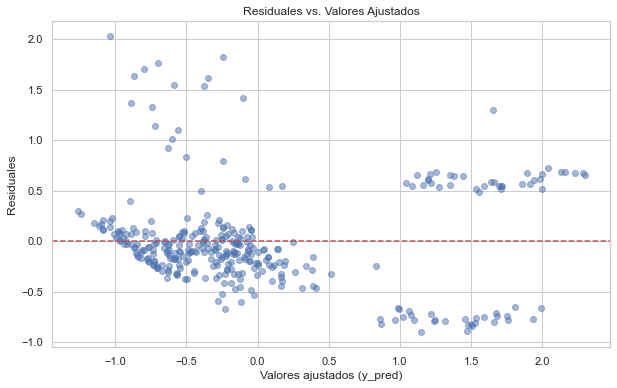

In [153]:
import matplotlib.pyplot as plt

# Obteniendo las predicciones del modelo
y_pred

# Calculando los residuales
residuals = y_test.flatten() - y_pred.flatten()

# Creando el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.flatten(), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados (y_pred)')
plt.ylabel('Residuales')
plt.title('Residuales vs. Valores Ajustados')
plt.show()


<h3>Optimizacón del Modelo<h3>

In [176]:
df_2 = df
df_2['age2'] =  df_2.age **2
df_2['sobre_peso'] = (df_2.bmi >=30).astype(int)
df_2['sobre_peso_fumador'] = (df_2.sobre_peso * df_2.smoker_yes)
df_2.head()
df_2

,age,bmi,children,charges_truncated,age2,sobre_peso,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,sobre_peso_fumador
0,19,27.900,0,16884.92400,361,0,0,1,0,0,1,0
1,18,33.770,1,1725.55230,324,1,1,0,0,1,0,0
2,28,33.000,3,4449.46200,784,1,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1089,0,1,0,1,0,0,0
4,32,28.880,0,3866.85520,1024,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,2500,1,1,0,1,0,0,0
1334,18,31.920,0,2205.98080,324,1,0,0,0,0,0,0
1335,18,36.850,0,1629.83350,324,1,0,0,0,1,0,0
1336,21,25.800,0,2007.94500,441,0,0,0,0,0,1,0


In [178]:
df_2.shape

(1338, 12)

In [179]:
X_cols = list(set(df_2.columns) - set(['charges_truncated']))
y_col = ['charges_truncated']

X=df_2[X_cols]
y = df_2[y_col]

X_train, X_test , y_train, y_test= train_test_split(X, y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
y_pred.shape

(335, 1)

In [180]:
mse = metrics.mean_squared_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))
r2 = metrics.r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))
mse_sc = metrics.mean_squared_error(y_test ,y_pred)
r2_sc = metrics.r2_score(y_test ,y_pred)

print('r2 : ', r2.round(4))
print('mse : ', mse.round(4))
print('r2 sc : ', r2_sc.round(4))
print('mse sc : ', mse_sc.round(4))

r2 :  0.8666
mse :  17518199.2823
r2 sc :  0.8666
mse sc :  0.123


In [189]:
import pandas as pd
import statsmodels.api as sm

# Asegúrate de que X_train_original es un DataFrame y tiene nombres de columnas
X_train_original = pd.DataFrame(sc_x.inverse_transform(X_train), columns=X_cols)

# Transforma de nuevo 'y_train' a su escala original y asegúrate de que es un DataFrame
y_train_original = pd.DataFrame(sc_y.inverse_transform(y_train), columns=y_col)

# Añadir una constante (intercepto) a los predictores
X_train_const = sm.add_constant(X_train_original)

# Ajustar el modelo OLS con statsmodels
ols_model = sm.OLS(y_train_original, X_train_const).fit()

# Imprimir un resumen del modelo
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      charges_truncated   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     607.9
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:30:54   Log-Likelihood:                -9824.8
No. Observations:                1003   AIC:                         1.967e+04
Df Residuals:                     991   BIC:                         1.973e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -344.4751   1562

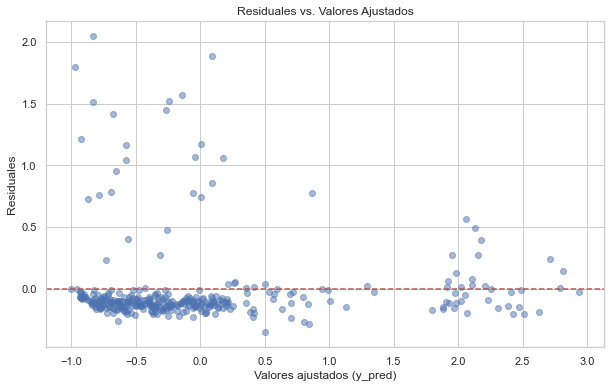

In [182]:
import matplotlib.pyplot as plt

# Obteniendo las predicciones del modelo
y_pred

# Calculando los residuales
residuals = y_test.flatten() - y_pred.flatten()

# Creando el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.flatten(), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados (y_pred)')
plt.ylabel('Residuales')
plt.title('Residuales vs. Valores Ajustados')
plt.show()

In [183]:
df_2.head(2)

,age,bmi,children,charges_truncated,age2,sobre_peso,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,sobre_peso_fumador
0,19,27.90,0,16884.9240,361,0,0,1,0,0,1,0
1,18,33.77,1,1725.5523,324,1,1,0,0,1,0,0


In [184]:
df_2.describe()

,age,bmi,children,charges_truncated,age2,sobre_peso,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,sobre_peso_fumador
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13221.583463,1734.444694,0.528401,0.505232,0.204783,0.242900,0.272048,0.242900,0.108371
std,14.049960,6.098187,1.205493,11940.429739,1125.768602,0.499379,0.500160,0.403694,0.428995,0.445181,0.428995,0.310964
min,18.000000,15.960000,0.000000,1252.972730,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,729.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1521.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,2601.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,48537.480726,4096.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
model_2.predict([[60, 30.64, 2, 3600, 0, 1, 1, 0, 1, 0, 0]])

array([[254.14142089]])

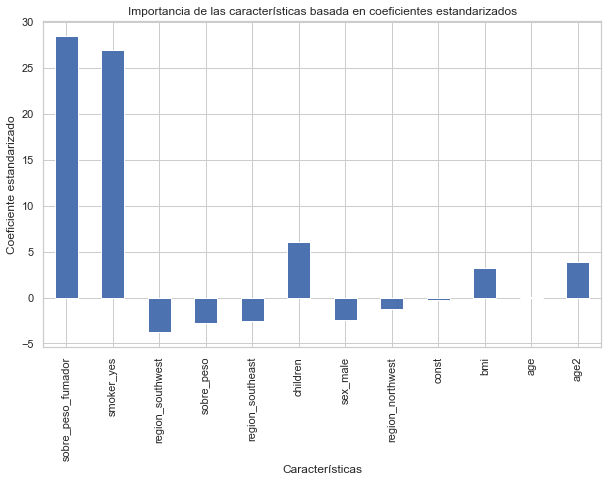

In [190]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que X_train_original y y_train_original son DataFrames con nombres de columnas
X_train_original = pd.DataFrame(sc_x.inverse_transform(X_train), columns=X_cols)
y_train_original = pd.DataFrame(sc_y.inverse_transform(y_train), columns=y_col)

# Añadir una constante al conjunto de datos
X_train_const = sm.add_constant(X_train_original)

# Ajustar el modelo de regresión lineal
ols_model = sm.OLS(y_train_original, X_train_const).fit()

# Crear un DataFrame con los coeficientes y los errores estándar
coef_summary = pd.DataFrame({'coef': ols_model.params.values,
                             'std_err': ols_model.bse.values,
                             'coef_abs': abs(ols_model.params.values)},
                            index=ols_model.params.index)

# Calcular los coeficientes estandarizados (pesos beta estandarizados)
coef_summary['standardized_coef'] = coef_summary['coef'] / coef_summary['std_err']

# Ordenar los coeficientes por su valor absoluto de coeficiente estandarizado
coef_summary_sorted = coef_summary.sort_values('coef_abs', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
coef_summary_sorted['standardized_coef'].plot(kind='bar')
plt.title('Importancia de las características basada en coeficientes estandarizados')
plt.xlabel('Características')
plt.ylabel('Coeficiente estandarizado')
plt.show()


In [193]:
import statsmodels.api as sm

# Asegúrate de que X_train es un DataFrame y no un ndarray.
# Si X_train es un ndarray, tendrás que convertirlo a un DataFrame. Suponiendo que 'X' era originalmente tu DataFrame y 'X_cols' la lista de columnas:

X_train = pd.DataFrame(X_train, columns=X_cols)

# Añadimos la columna de unos para el término del intercepto
X_train_const = sm.add_constant(X_train)

# Ajustamos el modelo inicial
model = sm.OLS(y_train, X_train_const).fit()

# Establecemos un umbral de significancia
p_value_threshold = 0.05

# Convertimos los p-valores a una Serie de pandas para poder usar `sort_values`
p_values = pd.Series(model.pvalues)

# Mientras el p-valor más alto esté por encima del umbral, seguimos eliminando variables
while p_values.max() > p_value_threshold:
    # Identificamos la variable con el p-valor más alto
    feature_to_remove = p_values.idxmax()
    
    # Si el feature es 'const', entonces detenemos, porque no queremos eliminar el intercepto
    if feature_to_remove == 'const':
        break
    
    # Eliminamos la variable del modelo
    X_train = X_train.drop(columns=[feature_to_remove])
    
    # Ajustamos el modelo nuevamente sin la variable menos significativa
    X_train_const = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_const).fit()
    
    # Actualizamos los p-valores
    p_values = pd.Series(model.pvalues)

# Imprimimos el resumen del modelo final
print(model.summary())


# Imprimimos las metricas
mse = metrics.mean_squared_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))
r2 = metrics.r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred))
mse_sc = metrics.mean_squared_error(y_test ,y_pred)
r2_sc = metrics.r2_score(y_test ,y_pred)

print('r2 : ', r2.round(4))
print('mse : ', mse.round(4))
print('r2 sc : ', r2_sc.round(4))
print('mse sc : ', mse_sc.round(4))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     669.4
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:44:51   Log-Likelihood:                -409.28
No. Observations:                1003   AIC:                             840.6
Df Residuals:                     992   BIC:                             894.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0